# **ISS Project 2022/23**
## Vadim Goncearenco (xgonce00@stud.fit.vutbr.cz)

### **Task 1**
Load all tones signals from **"klavir.wav"** file and select a 0.5 sec interval from stable part of the signal (we just skip first 0.25 seconds).  
On the graph there are **three periods** and **frequency spectrum(as log(PSD))** of tones **36**, **44** and **103** (obtained from **"xgonce00.txt**).  
Then these tones are saved as **audio/a_orig.wav**, **audio/b_orig.wav**, and **audio/c_orig.wav**.

For detailed implementation see functions **task1(task1.py)** and **get_signal_periods(base.py)**.

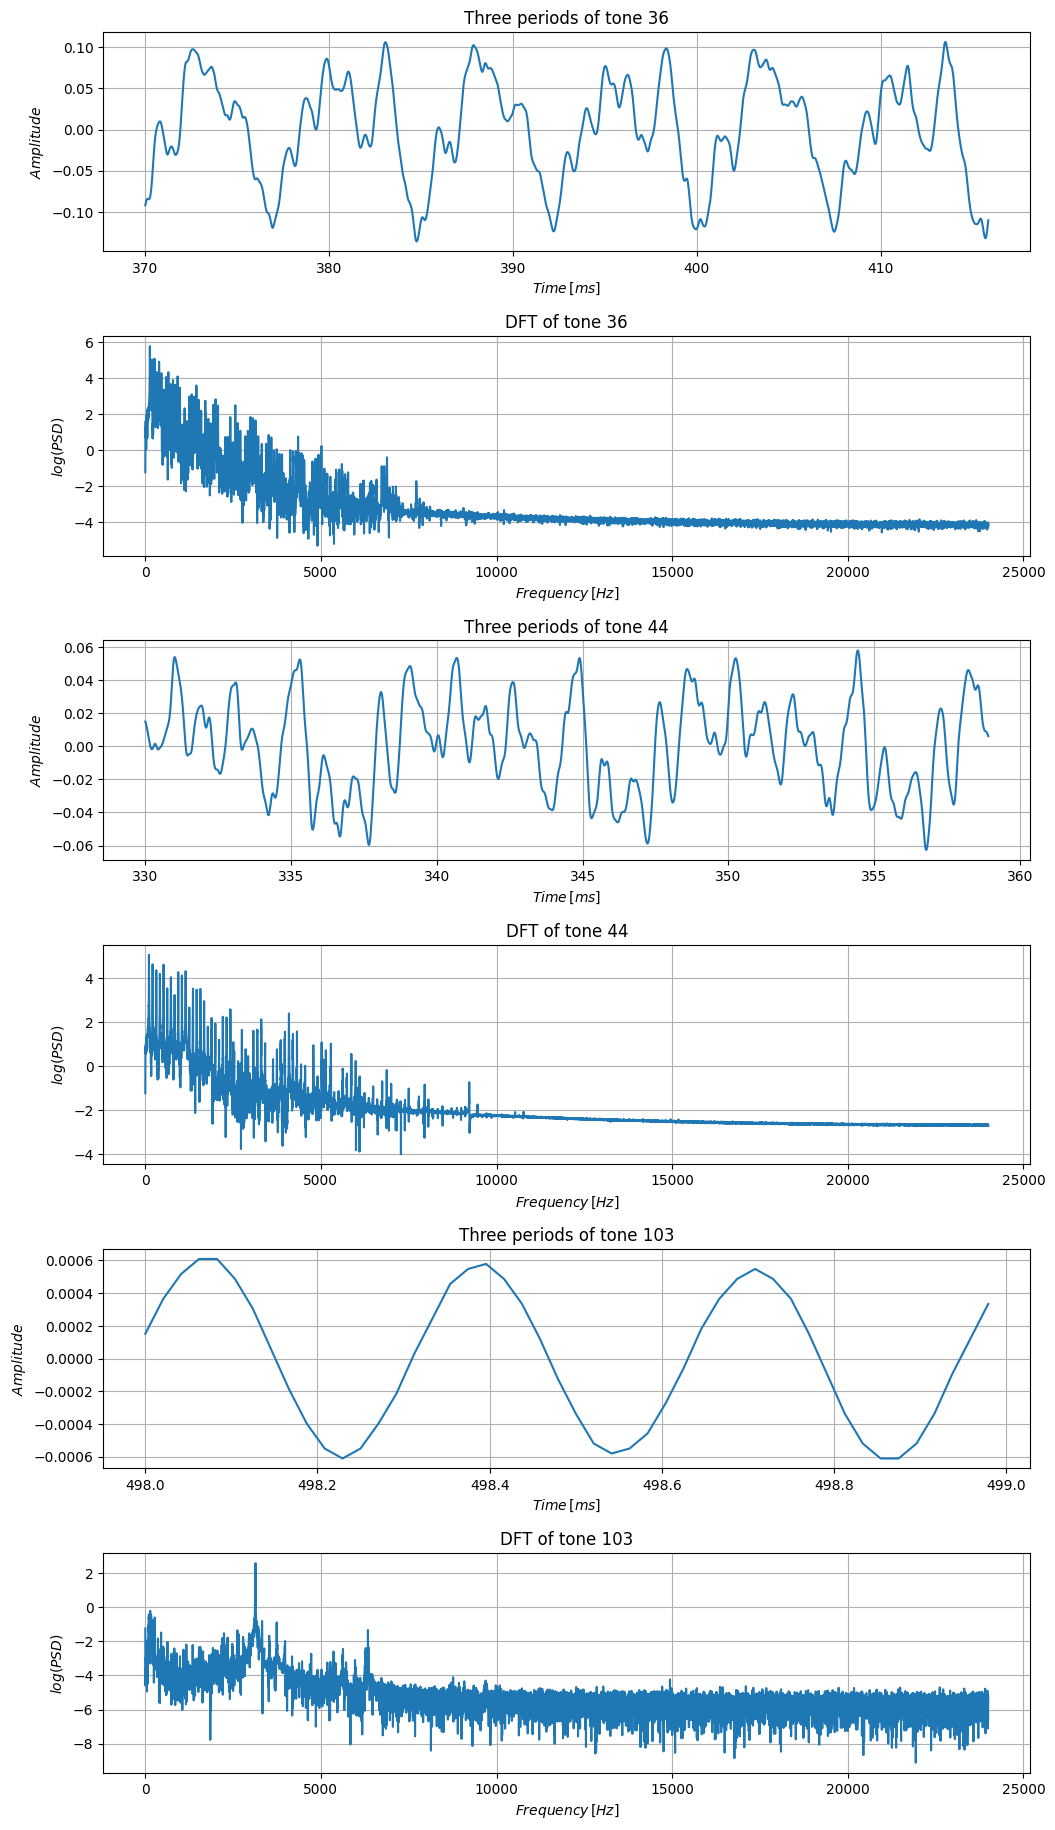

In [6]:
from task1 import task1
task1()

### **Task 2**
Since we have a real recorded signals of out tones, the fundamental frequency won't perfectly match the **MIDI tone frequencies**.  
This is most likely due to inharmonicity, measurement accuracy and piano being slightly out of tune and presence of some slight noise that is always there in real world.  

We use **DFT** and **autocorrelation** to estimate real frequency.  
In case of **DFT** we estimate **f0** just by finding maximum value in spectrum and taking the corresponding frequency.  

On the graph we can see the difference between **MIDI frequencies** and **both frequency estimations** for all tones, as well as the smallest difference out of two estimations.  
As we can see, **DFT** gives worse estimation for lower frequency and **autocorrelation** in it's turn gives worse estimation for very high frequencies.
 
For detailed implementation see functions **task2(task2.py)**, **calc_fund_freq_fft(task2.py)** and **calc_fund_freq_acorr(task2.py)**.

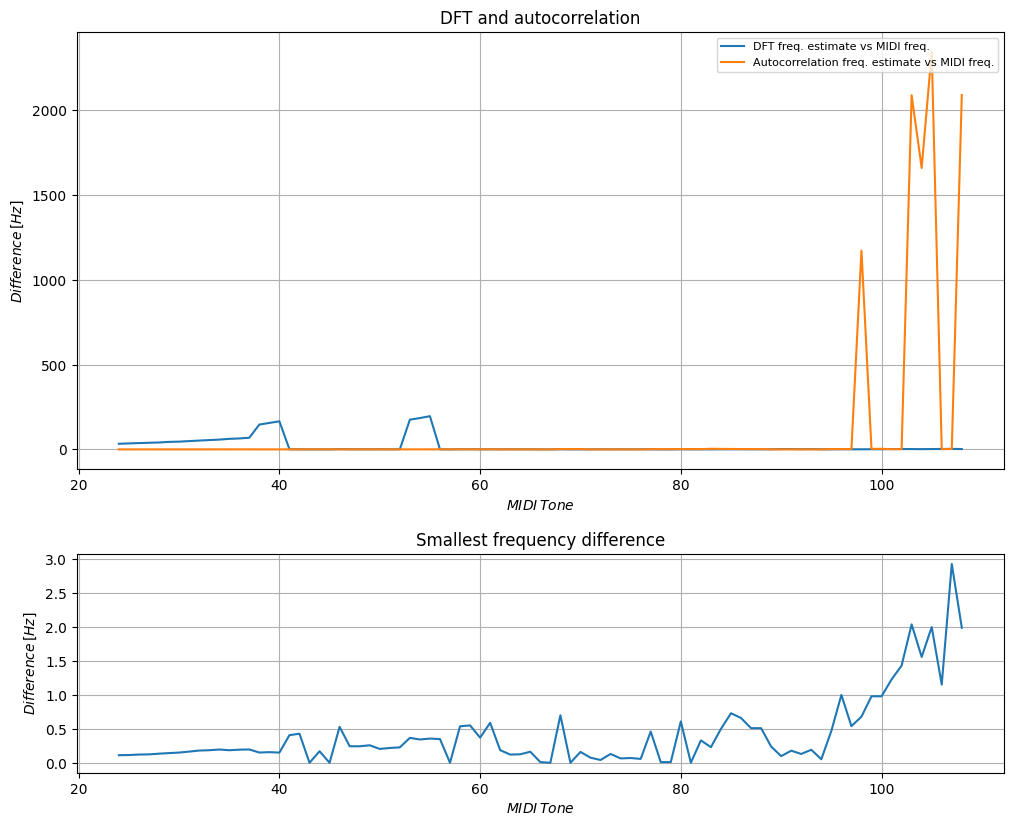

In [7]:
from task2 import task2
task2()

### **Task 3**
This time we use **DTFT** to find the real fundamental frequency.  

We compute **DTFT** with **100** sample points on an interval **[-100, 100] cents** around first **5** multiples of **f0**.  
We store the found frequencies and absolute values at each multiple.  
We divide each frequency by the current multiple, and then compute the fundamental frequency by calculating weighted average of these frequencies with absolute value of particular frequency being the weight.  

On the first graph there is a difference of frequency estimation with **DTFT** vs. estimation from **Task 2**.  
On the second graph there is a difference of frequency estimation with **DTFT** vs. **MIDI tone frequencies**.

This method should give us a more accurate estimate of fundamental frequency than **DFT** or **autocorrelation**.  

For detailed implementation see functions **task3(task3.py)**, **DTFT_freq_approx(task3.py)**, **DTFT_multiple(base.py)** and **DTFT(base.py)**.

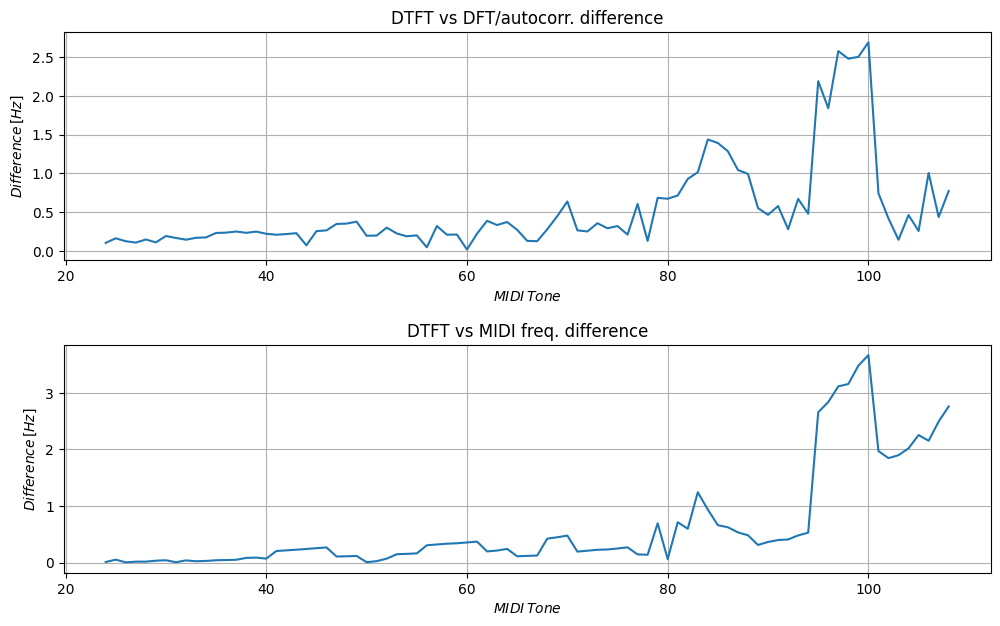

In [8]:
from task3 import task3
task3(200, 5, 100)

### **Task 4**
We represent each tone with **10 floating point numbers**, finding the precise position of the peaks and storing their **absolute value** and **phase shift**.  
We achieve that by using roughly the same method as in **Task 3**, that is we compute **DTFT** around **f0 multiples** but this time with **600 points** and for **10 multiples**.  

On the graph you can see the spectrum of tones **36**, **44** and **103** with red dots representing the **absolute values** of the peaks.  

For detailed implementation see functions **task4(task4.py)** and **DTFT_multiple(base.py)**.

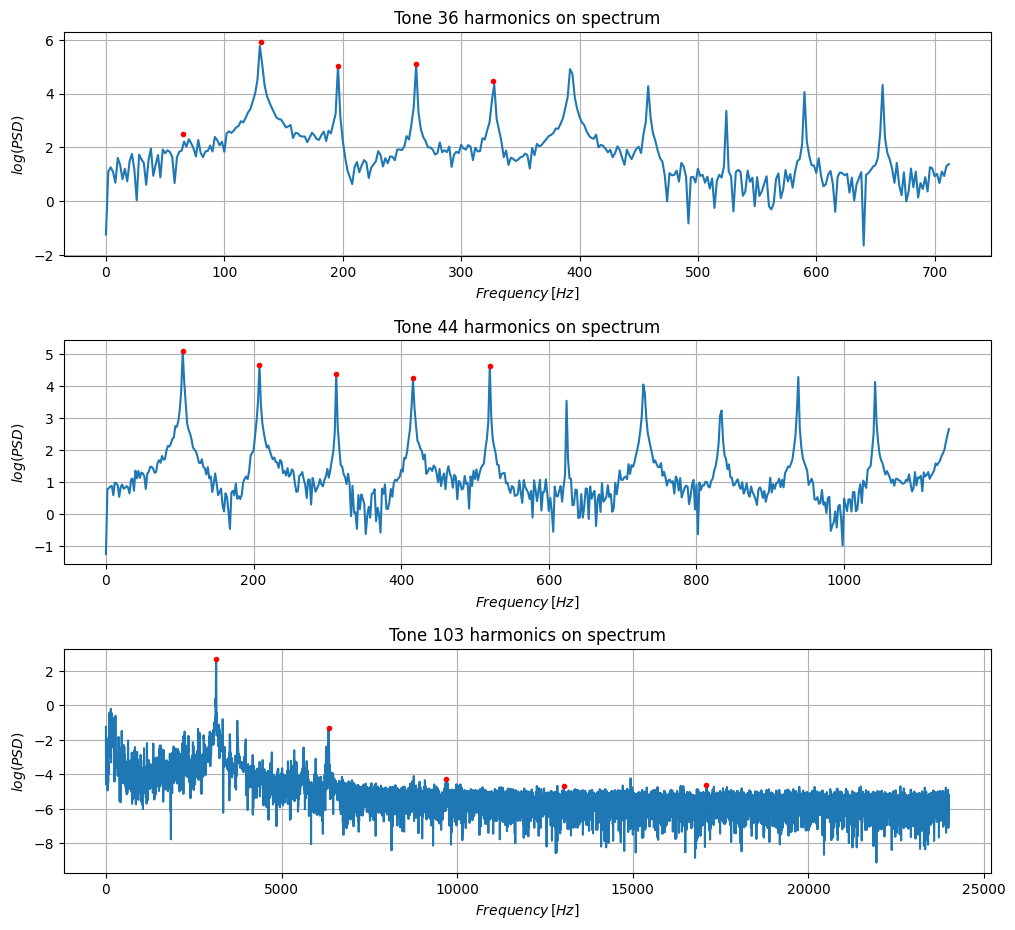

In [9]:
from task4 import task4
task4(200, 5, 600)

### **Task 5**
We synthesize tones **36**, **44** and **103** by using the same method as in **Task 3** and **4** to find the **first 10 harmonics**, their **absolute DTFT values** and **phase shift**.  
We the use this data to create **10 cosines** that **sum up** and give us the approximation of original signal.  
The only thing we need to correct is the amplitude so we multiply the synthesized signal by a constant **6**, which makes the amplitude roughly match the original.  

On the graph you can see **original(light blue)** and **synthesized(light orange)** signals plotted over each other.  

The reason for difference between original and synthesized signals is because we only sum up cosines with **first 10 harmonics**, but original signal consists of **much more frequencies** that are not so important but still **slightly alter the signal**.

For detailed implementation see functions **task5(task5.py)**, **generate_tone(base.py)** and **get_signal_periods(base.py)**.

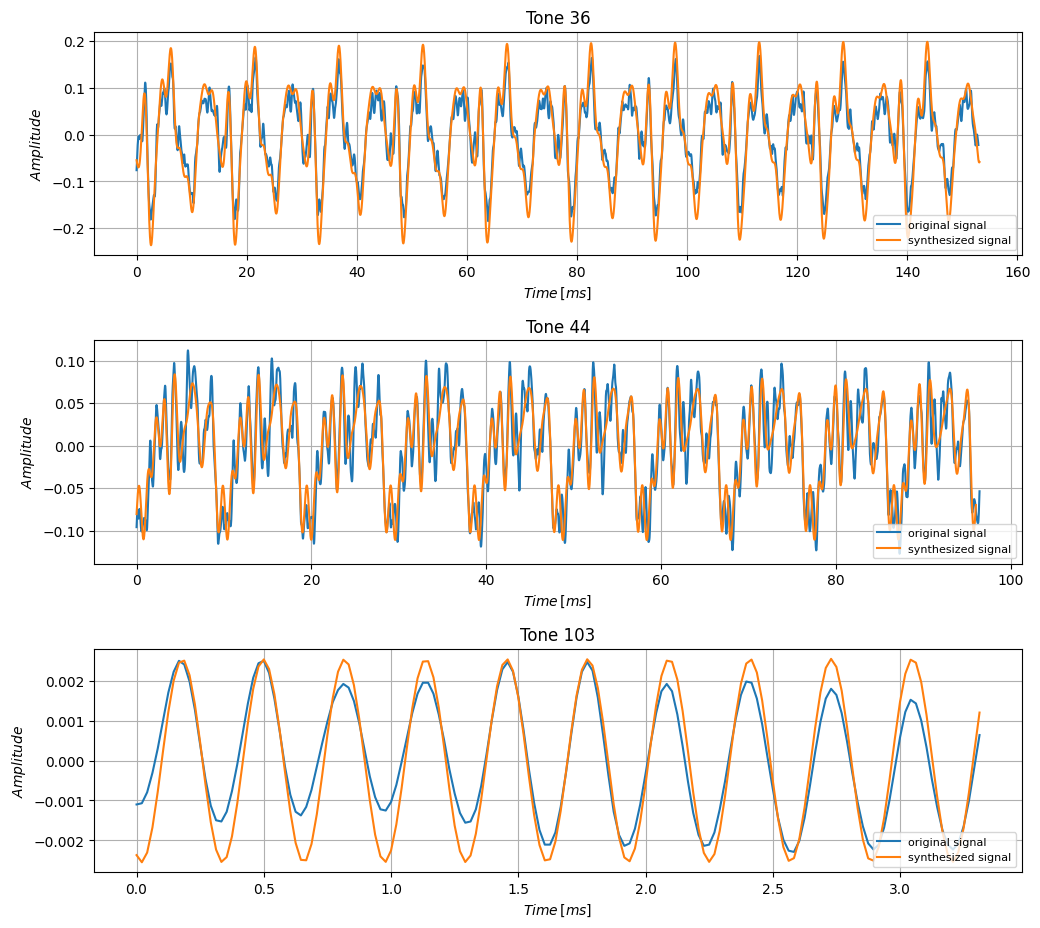

In [10]:

from task5 import task5
task5(1, 200, 10, 200)

### **Task 6**
We generate the music from **"skladba.txt"** file with sampling frequency of **48000** and **8000** and save it as **audio/out_48k.wav** and **audio/out_8k.wav** respectively.

For detailed implementation see functions **task6(task6.py)**, **generate_music(task6.py)** and **generate_tone(base.py)**.

In [11]:
from task6 import task6
task6(200, 10, 200)

### **Task 7**
Display spectrograms of first **10 seconds** of music generated in **Task 6**.  
Window length is **0.3 s.** , overlap **0 s.** , **2048 DFT samples** for **audio/out_48k.wav** and **512 DFT samples** for **audio/out_8k.wav** respectively.

For detailed implementation see functions **task7(task7.py)** and **plot_spectrogram(task7.py)**.

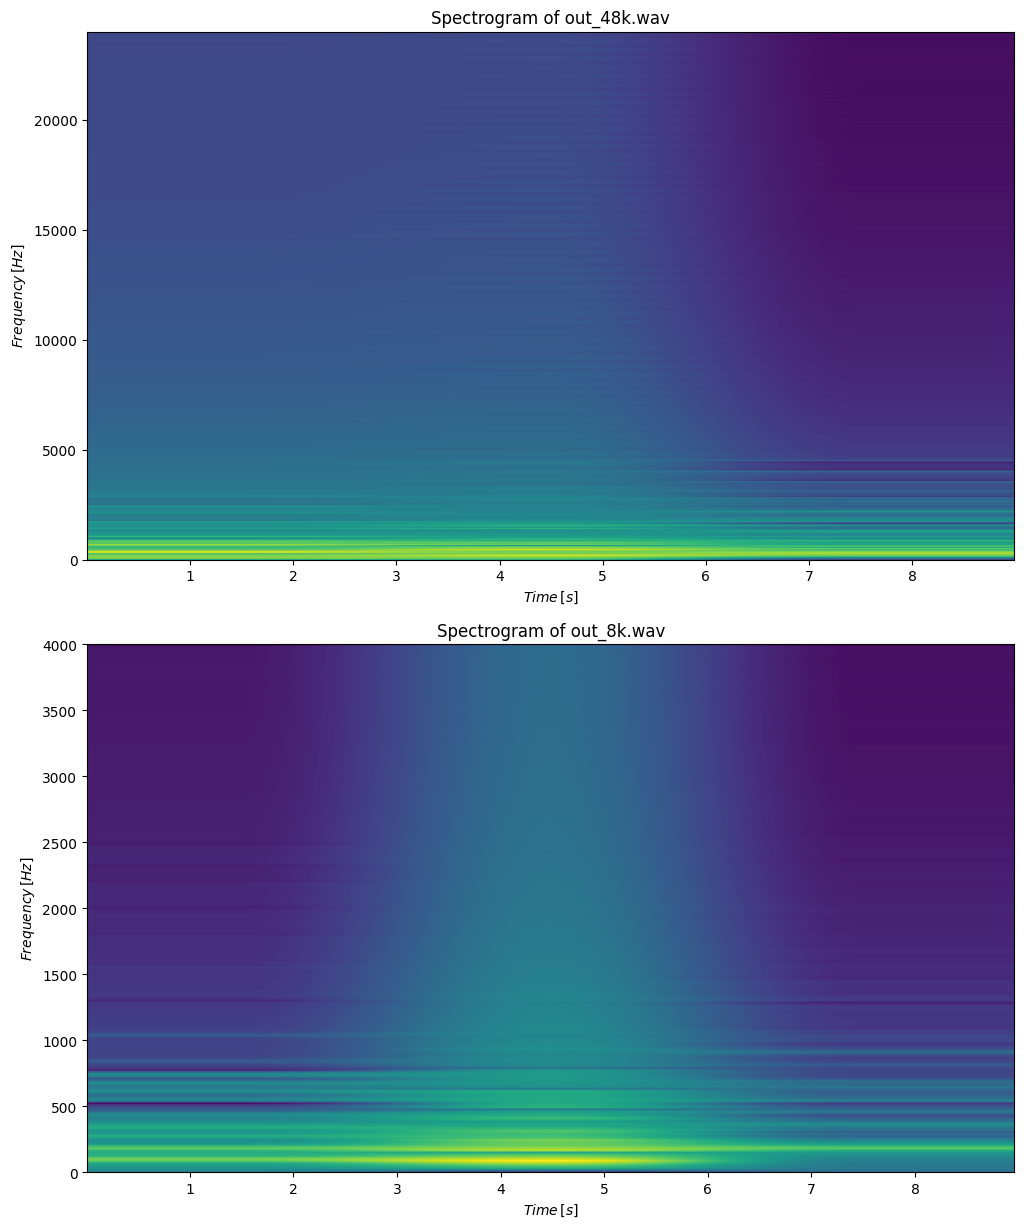

In [12]:
from task7 import task7
task7()

### **Resources used**:  

https://numpy.org/doc/  
https://docs.scipy.org/doc/scipy/  
https://stackoverflow.com/  
https://gist.github.com/endolith/255291